<a href="https://colab.research.google.com/github/Talieh-m/Data_Science/blob/main/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Librairies & Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix, roc_curve, roc_auc_score,auc

# **Importing dataset**

In [ ]:
df= pd.read_csv('mobile.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


# **Variables:**

**battery_power**:Total energy a battery can store in one time measured in mAh

**blue:**Has bluetooth or not.1 or 0

**clock_speed:**speed at which microprocessor executes instructions

**dual_sim:**Has dual sim support or not. 1 or 0

**fc:**Front Camera mega pixels

**four_g:**Has 4G or not. 1 or 0

**int_memory:**Internal Memory in Gigabytes

**m_dep:**Mobile Depth in cm

**mobile_wt:**Weight of mobile phone

**n_cores:**Number of cores of processor. 1-8

**pc:**Primary Camera mega pixels

**px_height:**Pixel Resolution Height

**px_width:**Pixel Resolution Width

**ram:**Random Access Memory in Megabytes

**sc_h:**Screen Height of mobile in cm

**sc_w:**Screen Width of mobile in cm

**talk_time:**ongest time that a single battery charge will last when you talk with it

**three_g:**Has 3G or not. 1 or 0

**touch_screen:**Has touch screen or not. 1 or 0

**wifi:**Has wifi or not. 1 or 0

*******************************************************
**target:**
**price_range**

# **Data Preparation**

In [ ]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
df['price_range'].unique()

array([1, 2, 3, 0])

# **Visualizing the Variables**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c15596090>,
      dtype=object)

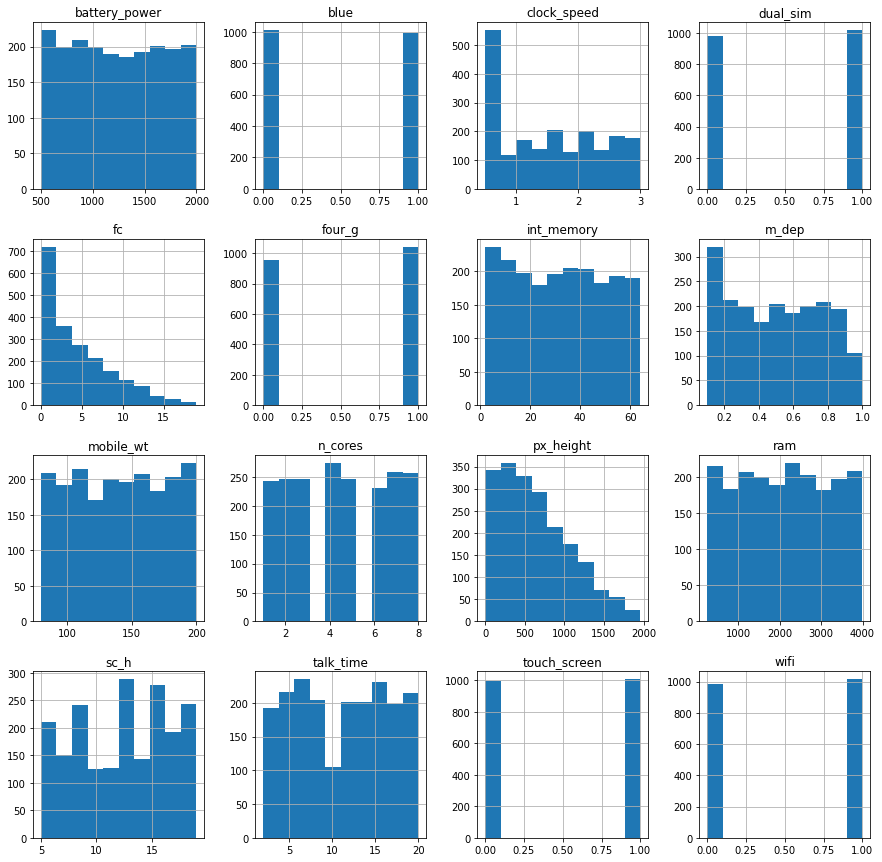

In [ ]:
figur = plt.figure(figsize = (15,15))
axis = figur.gca()
df.iloc[:,:-1].hist(ax = axis)

# **Finding the Number of Missing Data**

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# **Finding Outliers**

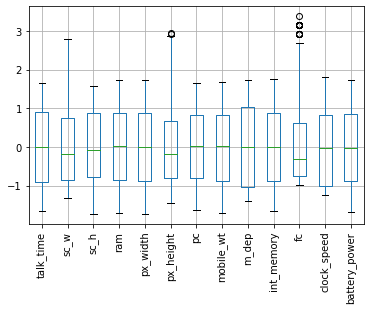

In [ ]:
#df2=pd.DataFrame(df["talk_time"],df['sc_w'],df['sc_h'],df['ram'],df['px_width'],df['px_height'],df["pc"],df['mobile_wt'],df['m_dep'],df['int_memory'],df["fc"],df["clock_speed"],df['battery_power'])
#df.boxplot(rot=90)
df2=df[["talk_time",'sc_w','sc_h','ram','px_width','px_height',"pc",'mobile_wt','m_dep','int_memory',"fc","clock_speed",'battery_power']]
normalized_df=(df2-df2.mean())/df2.std()
normalized_df.boxplot(rot=90)

# **Checking for Correlation**

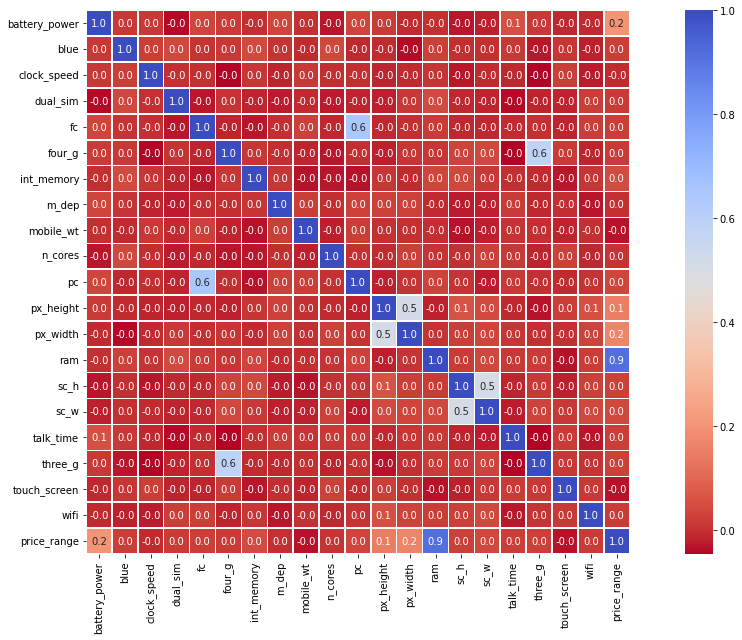

In [ ]:
plt.figure(figsize=(20,10))
df_co = df.corr()
sn.heatmap(df_co,cbar = True,  square = True, annot = True, fmt= '.1f',xticklabels= True, yticklabels= True,cmap='coolwarm_r', linewidths=.5)

# **Dropping Highly Correlated Data**

In [ ]:
target=df['price_range']
co_matrix = df.corr().abs()
# Select upper triangle of correlation matrix
upper_t = co_matrix.where(np.triu(np.ones(co_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper_t.columns if any(upper_t[column] > 0.5) ]
# Drop features 
df.drop(df[to_drop], axis=1, inplace=True)
df['price_range']=target
df.shape

(2000, 17)

# **Check for Balancing**

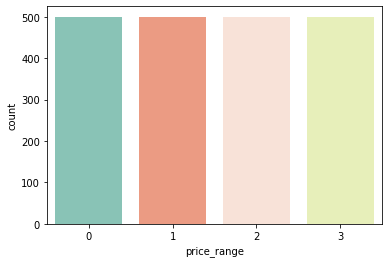

In [ ]:
sn.countplot(x='price_range',data=df, palette= ["#7fcdbb","#fc9272", "#fee0d2","#edf8b1"])

# **Defining X and Y**

In [ ]:
x= df.iloc[:,:-1].values 
y=df.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.25, random_state=0)

# **Scaling the Data**

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

# **Trainig the Model**

In [ ]:
classifier= SVC(kernel='rbf', C=1.5)
classifier.fit(x_train,y_train)

SVC(C=1.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# **Evaluating the Model**

accuracy_score=0.858


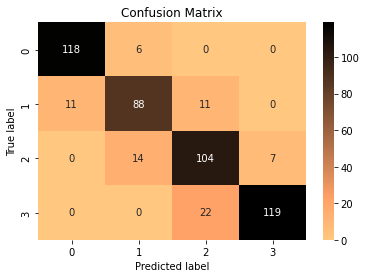

In [ ]:
y_pred= classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm,annot=True, cmap="copper_r", fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")
Accuracy_Score=np.round(accuracy_score(y_test, y_pred), decimals=3)
print("accuracy_score={a}".format(a=Accuracy_Score))

# **ROC Curve**

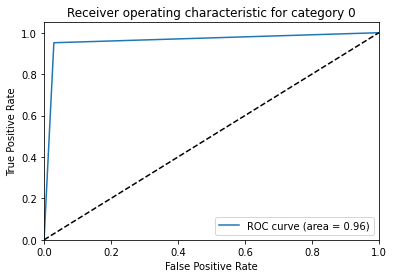

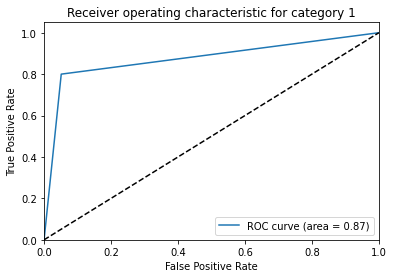

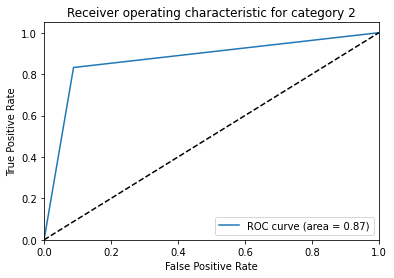

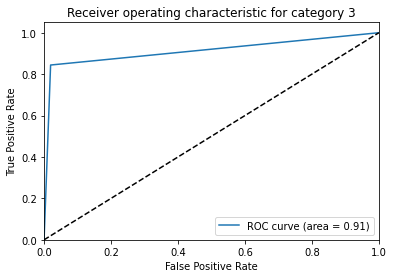

In [ ]:
n_classes=4
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test==i, y_pred==i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for category {i}')
    plt.legend(loc="lower right")
    plt.show()